In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.shape

(205, 26)

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### There are 10 categorical features 

### There are no null values 

In [8]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

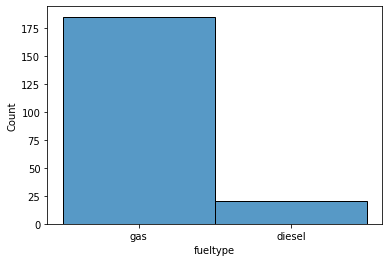

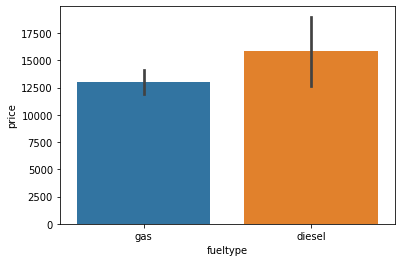

In [9]:
sns.histplot(data=df['fueltype'])
plt.show()
sns.barplot(data=df,x='fueltype',y='price')
plt.show()

### Here the maximum fueltype is gas and the cars with fuel type diesel are more costly

### 1. first graph shows car counts with maximum fuel type.
### 2. Second graph shows price of car depending on fuel. 

#**Handeling Categorical values**

In [10]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

## Removing some columns which might not be use full

In [11]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [12]:
df.drop(['CarName','car_ID','symboling','fuelsystem'],axis=1,inplace=True)

# **aspiration**

In [13]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [14]:
# Converting object values to int.
# std as 0 and turbo as 1

df['aspiration']=df['aspiration'].map({'std':0,'turbo':1})


#**doornumber**

In [15]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

### The maximum cars are with four doors 

In [16]:
#Converting fourdoors = 0 and twodoors = 1

df['doornumber']=df['doornumber'].map({'four':0,'two':1})

#**carbody**

In [17]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [18]:
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

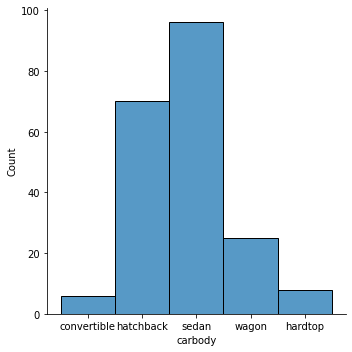

In [19]:
sns.displot(df['carbody'])

### The most selled cars are sedan and least ones are convertable

In [20]:
# Converting sedan = 0,hatchback = 1,wagon = 2,hardtop = 3,convertible = 4

df['carbody']=df['carbody'].map({'sedan':0,'hatchback':1,'wagon':2,'hardtop':3,'convertible':4})

#**drivewheel**

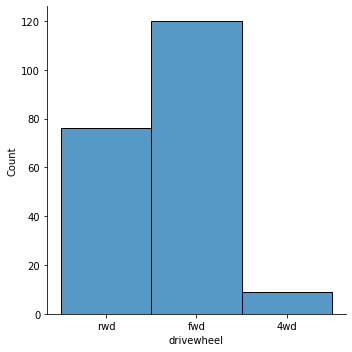

In [21]:
sns.displot(df['drivewheel'])

### The maximum cars used by people are front wheel drive

In [22]:
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [23]:
# Converting fwd(Front wheel drive) = 0, rwd(rare wheel drive) = 1, 4wd(Four wheel drive) = 2

df['drivewheel']=df['drivewheel'].map({'fwd':0,'rwd':1,'4wd':2})

#**enginelocation**

In [24]:
df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [25]:
# Converting front = 0 and rear=1

df['enginelocation']=df['enginelocation'].map({'front':0,'rear':1})

#**enginetype**

In [26]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [27]:
# Converting enginretype:
#dohc = 0, ohcv = 1, ohc = 2, l = 3, rotor = 4, ohcf = 5, dohcv = 6,

df['enginetype']=df['enginetype'].map({'dohc':0, 'ohcv':1, 'ohc':2, 'l':3, 'rotor':4, 'ohcf':5, 'dohcv':6})

In [28]:
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,0,1,4,1,0,88.6,168.8,64.1,48.8,...,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,0,1,4,1,0,88.6,168.8,64.1,48.8,...,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,0,1,1,1,0,94.5,171.2,65.5,52.4,...,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,0,0,0,0,0,99.8,176.6,66.2,54.3,...,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,0,0,0,2,0,99.4,176.6,66.4,54.3,...,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [29]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['fueltype', 'cylindernumber']

#**Fueltype**

In [30]:
df['fueltype']=df['fueltype'].map({'gas':0,'diesel':1})

In [31]:
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,0,1,4,1,0,88.6,168.8,64.1,48.8,...,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0,0,1,4,1,0,88.6,168.8,64.1,48.8,...,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0,0,1,1,1,0,94.5,171.2,65.5,52.4,...,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,0,0,0,0,0,0,99.8,176.6,66.2,54.3,...,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,0,0,0,0,2,0,99.4,176.6,66.4,54.3,...,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


#**cylindernumber**

In [32]:
df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [33]:
#Converting word forms to respective numbers  

df['cylindernumber']=df['cylindernumber'].map({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    int64  
 1   aspiration        205 non-null    int64  
 2   doornumber        205 non-null    int64  
 3   carbody           205 non-null    int64  
 4   drivewheel        205 non-null    int64  
 5   enginelocation    205 non-null    int64  
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    int64  
 12  cylindernumber    205 non-null    int64  
 13  enginesize        205 non-null    int64  
 14  boreratio         205 non-null    float64
 15  stroke            205 non-null    float64
 16  compressionratio  205 non-null    float64
 1

## Categorical values are converted to numeric values 

## **Spliting the data** 

In [35]:
y = df['price']
x = df.drop(columns='price')


# Finding important features  

In [36]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [37]:
print(model.feature_importances_)

[0.00420873 0.01002931 0.00225565 0.00430321 0.02653522 0.01548889
 0.01775615 0.03400449 0.05050157 0.00474295 0.16951531 0.00944311
 0.12638488 0.22434009 0.02206731 0.00685687 0.00642199 0.10227377
 0.01584997 0.07827798 0.06874254]


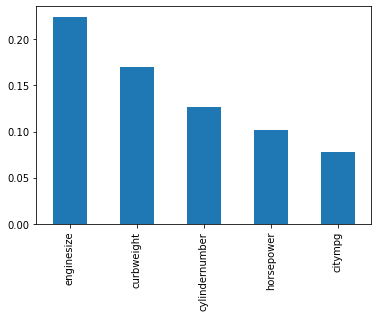

In [38]:
feat_importances = pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(5).plot(kind='bar')
plt.show()

### This shows the most important feature is enginesize

# Spliting training data and testing data 

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train,y_test = train_test_split(x_scaled ,y,test_size = 0.30)

In [51]:
x_train

array([[-0.32879797, -0.46929532,  1.13038833, ...,  0.78785546,
         0.88574028,  1.05519283],
       [-0.32879797, -0.46929532, -0.88465174, ..., -0.68328649,
         0.27282295,  0.18178288],
       [-0.32879797, -0.46929532, -0.88465174, ..., -0.68328649,
         1.03896961,  0.9096245 ],
       ...,
       [-0.32879797, -0.46929532, -0.88465174, ...,  0.78785546,
         0.11959362,  0.18178288],
       [-0.32879797, -0.46929532, -0.88465174, ...,  0.57769233,
        -0.34009437, -0.40049041],
       [-0.32879797, -0.46929532, -0.88465174, ...,  0.57769233,
         1.95834559,  1.78303445]])

In [52]:
y_train

78      6669.0
154     7898.0
141     7126.0
17     36880.0
204    22625.0
        ...   
55     10945.0
77      6189.0
188     9995.0
195    13415.0
45      8916.5
Name: price, Length: 143, dtype: float64

#**Hyperparameters**

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [55]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [56]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [70]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [71]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [72]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [73]:
rf_random.best_score_

0.8384720416733955

In [74]:
predictions=rf_random.predict(x_test)
predictions

array([15187.003     , 18640.414     , 16541.169     ,  7246.96513333,
       17128.972     , 34500.956     , 15240.16016667,  9090.09833333,
        8065.66733333, 15240.16016667,  8220.886     ,  9644.275     ,
       18458.822     ,  8229.20193333, 10680.96333333, 15563.891     ,
       19450.119     , 28120.397     , 16751.03316667, 17565.259     ,
       21799.03      ,  8069.40316667, 33145.766     , 10978.63016667,
       16973.58666667, 18256.693     , 15346.025     ,  8198.33866667,
       32770.96      ,  7805.0695    ,  6757.7975    , 10353.24066667,
       17240.633     , 13425.37      , 18110.134     , 13794.502     ,
       11353.88066667,  8537.63      , 32953.658     , 10200.7195    ,
       16903.60416667,  7121.3601    ,  6394.12833333, 14524.51216667,
       10258.988     ,  9675.434     , 10488.72083333,  7626.6985    ,
       18199.687     , 11991.276     , 30396.217     ,  9285.07      ,
       26860.099     ,  9647.57233333, 15634.599     , 13984.925     ,
      

In [75]:
rf_random.score(x_train,y_train)

0.9895475313710028

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


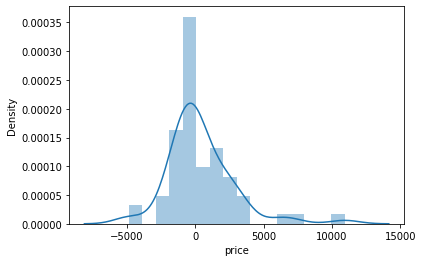

In [77]:
sns.distplot(y_test-predictions)

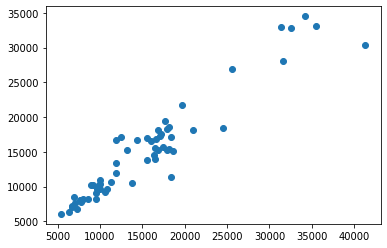

In [78]:
plt.scatter(y_test,predictions)

In [79]:
from sklearn import metrics


In [80]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1608.2100102150537
MSE: 6107844.102106226
RMSE: 2471.4052889209056


In [83]:
import pickle
# open a file, where you ant to store the data
file = open('Car_Price_Prediction_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)